* # Análisis exploratorio sobre un dataset que contiene la cantidad de toques dentreo del area de un jugador en la PREMIER LEAGUE - 19/20 
* # Podemos hacer lo siguientes análisis
    * ## Análisis de impacto en el equipo.**
    * ## Análisis de comparación de jugadores u equipos.**
    * ## Por ultimo Predicción de goles por toques en el area(para eso tendre que agregar uno por uno los goles convertidos por cada jugador por que no encontre ningun dataset que contenga los goleadores de la temporada 19/20) **
    
    ----
* #### PAGINA DONDE SACAMOS LOS GOLES DE ALGUNOS JUGADORES Y AGREGAREMOS MANUALMENTE. https://www.sport.es/es/resultados/2019-2020/premier-league/maximos-goleadores/

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [179]:
#### #### Como esta compuesto el dataset
data = pd.read_csv("./toques-area-EPL.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           100 non-null    int64  
 1   Player Name     100 non-null    object 
 2   Position        100 non-null    object 
 3   Team            100 non-null    object 
 4   Touches in Box  100 non-null    int64  
 5   Starts          100 non-null    int64  
 6   Minutes Played  100 non-null    int64  
 7   Fouled          100 non-null    int64  
 8   goles           58 non-null     float64
dtypes: float64(1), int64(5), object(3)
memory usage: 7.2+ KB


In [180]:
data.head()

,index,Player Name,Position,Team,Touches in Box,Starts,Minutes Played,Fouled,goles
0,0,Salah,Forward,Liverpool,248,33,2876,18,19.0
1,1,Sterling,Forward,M. City,239,30,2651,40,20.0
2,2,Zaha,Forward,Crystal Palace,192,37,3280,120,4.0
3,3,Roberto Firmino,Forward,Liverpool,184,34,2988,16,9.0
4,4,Raúl Jiménez,Forward,Wolves,171,37,3236,35,17.0


* Vamos a modificar los nombres de las columnas asi se entiende mas.
-----

In [181]:
data = data.rename(columns={"Player Name":"jugadores","Position":"posicion","Team":"equipo",
                           "Touches in Box":"toques_area","Starts":"comienzo",
                            "Minutes Played":"minutos_jugados", "Fouled":"foul_recibido"})

In [182]:
data.describe()

,index,toques_area,comienzo,minutos_jugados,foul_recibido,goles
count,100.000000,100.00000,100.000000,100.000000,100.000000,58.000000
mean,49.500000,88.12000,26.080000,2304.070000,33.950000,9.241379
std,29.011492,42.50877,7.824695,672.247899,23.927658,6.009672
min,0.000000,44.00000,6.000000,764.000000,9.000000,0.000000
25%,24.750000,55.00000,21.000000,1841.750000,18.000000,4.000000
50%,49.500000,75.50000,26.500000,2299.500000,29.000000,8.000000
75%,74.250000,116.25000,32.000000,2869.250000,40.250000,13.000000
max,99.000000,248.00000,38.000000,3420.000000,167.000000,23.000000


**Observación** 
* La media de toques en el area de los 100 jugadores es de %88.16
* La media de goles es de 9.42 
* La media de minutos jugados es de 2304' 
* La media de foul recibido es de 34 por cada jugador
------

In [183]:
data.isna().sum()

index               0
jugadores           0
posicion            0
equipo              0
toques_area         0
comienzo            0
minutos_jugados     0
foul_recibido       0
goles              42
dtype: int64

* Tenemos los valores nulos de los jugadores que no cargamos los goles o que no convirtieron.
----

In [184]:
data["goles"] = data["goles"].fillna(0).astype(int)
#data["goles"] = data["goles"].astype(int)

* Pasaremos lo valores N/A a 0 y luego los numero de goles pasarlos a numero enteros.
---

In [185]:
import seaborn as sns

C:\Users\Acer\AppData\Local\Temp\ipykernel_5652\2085987848.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_EPL = data.corr()


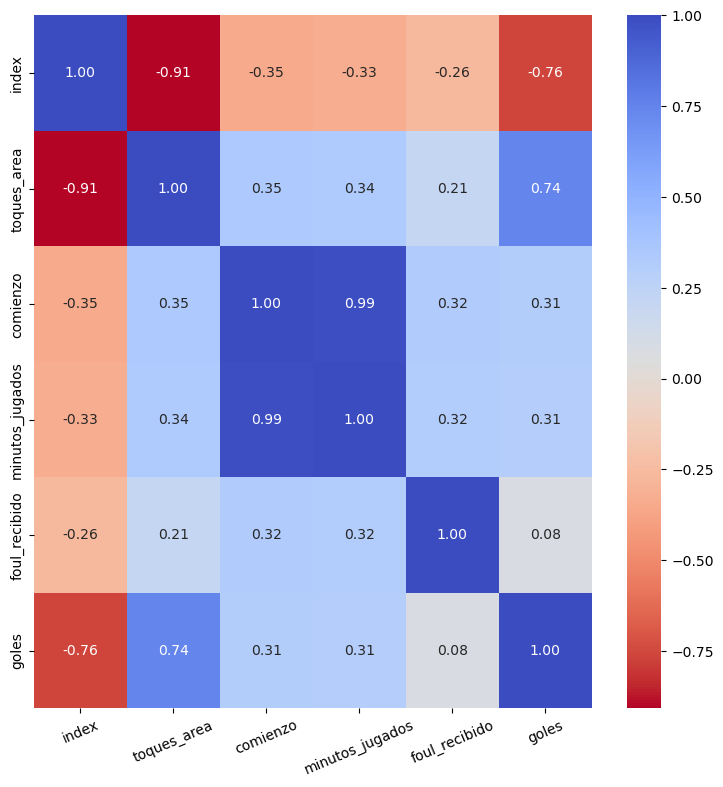

In [186]:
#### ##### ### Creamos la correlacion entre variables y la graficamos con la libreria seaborn 
correlacion_EPL = data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(correlacion_EPL , annot=True , fmt ='.2f',
            cmap=plt.cm.coolwarm_r)
plt.xticks(rotation=23)
plt.show()

* # Observación.
* ## Las variables con mayor correlacion son las siguientes:
    * toques en el area y goles = 0.75
    * minutos jugados con el comienzo del partido = 0.99
    * comoienzo de partido con toques en el area = 0.35
    * toques en el area y minutos jugados = 0.34
    * foul recibido junto a comienzo y minutos jugados = 0.32
    * goles junto a comienzo y minutos jugados = 0.29
    * foul recibidos y toques en el area = 0.21
    * Por ultimo el mas baja de las correlaciones positivas es goles y foul recibido = 0.09

**Dandole una redación rapida podemos entender que mas minutos de juego y comienzo del partido tiene mas posibilidades de tocar mas el area, recibe mas fouls y tiene mas posibilidades de gol**

----
----

In [187]:
#### #### dumificamos las columnas que no tengan valores numericos

posicion_dummy = pd.get_dummies(data["posicion"])
equipo_dummy = pd.get_dummies(data["equipo"])

In [11]:
print("posiciones"),print(posicion_dummy.sum())

posiciones
Defender      13
Forward       51
Midfielder    36
dtype: int64


(None, None)

* ## Observación
* ### Podemos ver que los delanteros tienen mas toques en el area de los principales 100 jugadores de la premier league
    * #### Delanteros = 51
    * #### Medio/volantes = 36
    * #### Defensores = 13
    ------

In [12]:
print("Cantidad de jugadores por equipos"),print(equipo_dummy.sum())

Cantdad de jugadores por equipos
Arsenal           3
Aston Villa       5
Bournemouth       5
Brighton          3
Burnley           4
Chelsea           6
Crystal Palace    5
Everton           8
Leicester         6
Liverpool         6
M. City           7
M. United         5
Newcastle         3
Norwich City      4
Sheffield Utd     7
Southampton       5
Tottenham         4
Watford           5
West Ham          4
Wolves            5
dtype: int64


(None, None)

* ### Observación**
* ### El equipo que tiene mas jugadores en toques dentro del area es el Everton con 8 jugadores
    * ### Everton = 8 | Sheffield Utd = 7 - | M.city = 7 | LIVERPOOL = 6 | Chelsea & Leicester = 6
----------
    
    
* # PREDICCIONES.
---
* # Regresión lineal simple.

* ### Predicción del número de goles que un jugador marcará en función de la cantidad de toques que tenga en el área

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
### Variables predictoras y a predecir
X = data[["toques_area"]]
y = data[["goles"]]

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.3 , random_state=42) #Conjunto de training y test

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
#### Modelo de regression lineal 

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train , y_train)

LinearRegression()

In [18]:
y_pred = modelo_lineal.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print("MSE",mse)
print("R2",r2*100)

MSE 12.002429623520408
R2 67.60380679831943


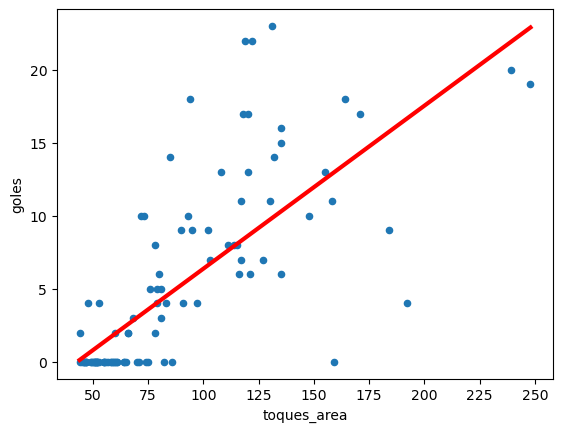

In [21]:
### #### Creamos una predicción general para luego hacer un grafico y demostrar la mejor predicción que creo el modelor
y_pred1 = modelo_lineal.predict(X)

### #### Creamos el grafico
data.plot(kind="scatter" , x="toques_area" , y="goles")
plt.plot(pd.DataFrame(data["toques_area"]) , y_pred1, c="red" , linewidth=3)

* **Linea roja** es la predicción y los **puntos azules** son los datos originales del dataset.
----

* ## Vemos que con una regresión lineal simple el modelo va algo positivo, teniendo en cuenta que podremos agregar mas variables predictoras e intentando otros modelos de predicciones
    * ### El valor de efectividad del modelo es de %67.60
    * ### el valor de 'MSE' es de %12 (mide la discrepancia entre los valores reales y las predicciones)
.-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------.
-----
---

* # PREDICCIÓN.
* # Regresión Lineal con mas variables predictoras.

In [22]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [23]:
#### #### Primero agregamos al dataset la variable posición que dumificamos 
data_dummy = pd.concat([data , posicion_dummy], axis=1)
data_dummy = data_dummy.drop(["posicion"], axis=1)

In [24]:
#### ### Lista de variables predictoras y a predecir
X1 = data_dummy[["toques_area","comienzo","minutos_jugados","foul_recibido","Defender","Forward","Midfielder"]]
Y = data_dummy["goles"]

In [25]:
#### #### le pediremos que nos elija las mejores variables para usar y crear el modelo
estimator = SVR(kernel="linear")
selector = RFE(estimator , n_features_to_select=4 , step=1)
selector = selector.fit(X1,Y)

In [26]:
#### Nos diga las mejores variables para usar
selector.ranking_

array([1, 2, 4, 3, 1, 1, 1])

In [27]:
X_pred = X1[["toques_area","Defender","Forward","Midfielder"]]

In [28]:
lm = LinearRegression()
lm.fit(X_pred , Y)

LinearRegression()

In [29]:
#### ### Dividimos otra vez en variable grupos y entrenamiento. 
X_train , X_test , y_train , y_test  = train_test_split(X_pred, Y, test_size=0.3 , random_state=42 )

In [30]:
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE:{mse}")
print(f"r2:{r2}")

MSE:10.2351851666449
r2:0.72373840421124


* ## Podemos ver que el modelo con las variables seleccionadas por el **RFE**, Hizo mejorar un poco mas el modelo un 6% mas
    * ### El valor de efectividad del modelo ahora es de %72.37
    * ### el valor de 'MSE' es de %10.23 (mide la discrepancia entre los valores reales y las predicciones)
.------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----
* # Creamos una validación cruzada para ver como se comporta el modelo.

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error

In [32]:
y_pred = cross_val_predict(lm , X_pred , Y , cv=99)
mae = mean_squared_error(Y , y_pred)
r2 = r2_score(Y , y_pred)


print(f"MAE: {mae}")
print(f"r2:{r2}")

MAE: 18.925595400911035
r2:0.5427539864096256


* ## El modelo tiene un MAE de 18.92 y un R2 de 54.27, Lo que sugiere que el modelo puede hacer predicciones precisas en promedio, pero todavía hay una cantidad significativa de variabilidad en los datos que no se explica por las variables predictoras utilizadas en el modelo.
-----
------------------

# Random Forest Regressor.

In [33]:
data_forest = data_dummy.drop(["goles"], axis=1)

In [34]:
data_forest =pd.concat([data_forest,data["goles"]] , axis=1)
data_forest.head()

,index,jugadores,equipo,toques_area,comienzo,minutos_jugados,foul_recibido,Defender,Forward,Midfielder,goles
0,0,Salah,Liverpool,248,33,2876,18,0,1,0,19
1,1,Sterling,M. City,239,30,2651,40,0,1,0,20
2,2,Zaha,Crystal Palace,192,37,3280,120,0,1,0,4
3,3,Roberto Firmino,Liverpool,184,34,2988,16,0,1,0,9
4,4,Raúl Jiménez,Wolves,171,37,3236,35,0,1,0,17


In [35]:
predictoras = X1
target = data_forest[["goles"]]

In [36]:
from sklearn.ensemble import RandomForestRegressor 

In [37]:
X_train , X_test , y_train , y_test = train_test_split(predictoras , target ,test_size=0.3 , random_state=42)

In [38]:
### ### Creamos el modelo y lo entrenamos
random_forest = RandomForestRegressor(n_estimators=300 , random_state=42)
random_forest.fit(X_train , y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5652\1644985222.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train , y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [39]:
y_pred = random_forest.predict(X_test)

In [40]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Coeficiente de determinación R2:", r2*100)
print("Error absoluto medio MAE:", mae)

Coeficiente de determinación R2: 58.62698336532309
Error absoluto medio MAE: 2.6046666666666667


# RESUMEN HASTA AHORA.
* ## El coeficiente de determinación R2 obtenido de 58.62 indica que el modelo de Random Forest Regressor explica aproximadamente el 58% de la variabilidad en la variable objetivo (en este caso, el porcentaje de goles). Por lo tanto, podemos decir que el modelo tiene un buen ajuste.


* ## El error absoluto medio MAE de 2.60 indica que, en promedio, las predicciones del modelo tienen un error absoluto de 2.62 puntos porcentuales en comparación con los valores reales de la variable objetivo.
    * ### Es decir que que modelor del Random Forest Regressor prece ser un buen predictor del porcentaje de goles, ya que tiene un coeficiente de determinación razonablemente alto y un error absoluto medio bajo. Sin embargo, aún puede haber espacio para mejorar el modelo utilizando técnicas.
# -----------------------------------------------------------------------------------------------------------
# 2DA PARTE....

* ## Random Forest Regressor (datos normalizados)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
predictoras = X1
target = data_forest[["goles"]]

### ##### Normalizamos los datos 
scaler = MinMaxScaler()
X_scalado = scaler.fit_transform(X1)

In [43]:
X_train , X_test , y_train , y_test = train_test_split(predictoras , target ,test_size=0.3 , random_state=42)

In [44]:
random_forest_sca = RandomForestRegressor(n_estimators=300 , random_state=18)
random_forest_sca.fit(X_train , y_train)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5652\705843672.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_sca.fit(X_train , y_train)


RandomForestRegressor(n_estimators=300, random_state=18)

In [45]:
#### #### Creamos una predicción con el conjunto de prueba
y_pred = random_forest_sca.predict(X_test)

In [46]:
r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)

print("Coeficiente de determinación R2:", r2)
print("Error absoluto medio MAE:", mae)

Coeficiente de determinación R2: 0.5816100347888675
Error absoluto medio MAE: 2.6378888888888885


* ## Se puede ver que el R2 y MAE bajaron apenas un poco cuando normalizamos los datos
    * ## El coeficiente de determinación R2 obtenido es de = 58.16
    * ## El error absoluto medio MAE es de = 2.63
-------------
------------

# Red Neuronal (datos reescalado) para seguir sobre la predicción de goles.

In [114]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [115]:
XR = X1

In [116]:
X_train, X_test, y_train, y_test = train_test_split(XR, y, test_size=0.3, random_state=42)

In [117]:
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.fit_transform(X_test)

In [118]:
#### #### Creamos el modelo
modelo = Sequential()
modelo.add(Dense(64,activation='relu' , input_dim=X_train.shape[1]))
modelo.add(Dense(64,activation='relu'))
modelo.add(Dense(32,activation='relu'))
modelo.add(Dense(1))

In [119]:
### ### COMPILAMOS EL MODELO
modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001) , loss="mean_squared_error")

In [120]:
### ### Entrenamos el modelo
modelo.fit(X_train , y_train , epochs=100 , batch_size=62 , verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 65.3434
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 63.8624
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 62.4519
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 61.0107
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 59.5482
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 58.3059
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 56.8538
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 55.5129
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 54.1090
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 52.4690
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 50.9959
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 49.2453
Epoch 13/100
2/2 [============================

In [121]:
score = modelo.evaluate(X_test , y_test)

1/1 [==============================] - 0s 156ms/step - loss: 13.8646


In [122]:
prediction = modelo.predict(X_test)

1/1 [==============================] - 0s 96ms/step


In [123]:
print('Coeficiente de determinación R2:', r2_score(y_test, prediction)*100)
print('Error absoluto medio MAE:', mean_absolute_error(y_test, prediction))

Coeficiente de determinación R2: 62.57743051582902
Error absoluto medio MAE: 2.3409573920071125


 * ## El R2 y MAE bajaron nuevamente un poco cuando utilizamos esta red neuronal
    * ### El coeficiente de determinación R2 obtenido es de = 62.57
    * ### El error absoluto medio MAE es de = 2.34
-----
-------
# Red neuronal (datos normalizados).

In [57]:
### ### Normalizamos los datos
X_norm = (X1- X1.mean() / X1.std())

In [58]:
#### datos entrenamiento y test
X_train , X_test , Y_train , Y_test = train_test_split (X_norm , Y , test_size=0.3 , random_state=19)

In [59]:
modeloR = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[7]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [60]:
modeloR.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001) , loss = "mse" , metrics=["mae"])
history = modeloR.fit(X_train , Y_train , epochs=50, validation_split=0.3 , verbose=1)

Epoch 1/50


C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2/2 [==============================] - 1s 276ms/step - loss: 20995.6211 - mae: 133.0858 - val_loss: 812.7407 - val_mae: 26.2404
Epoch 2/50
2/2 [==============================] - 0s 49ms/step - loss: 559.4615 - mae: 21.6171 - val_loss: 1654.9056 - val_mae: 38.7419
Epoch 3/50
2/2 [==============================] - 0s 51ms/step - loss: 2308.1357 - mae: 45.6100 - val_loss: 2387.0491 - val_mae: 46.5881
Epoch 4/50
2/2 [==============================] - 0s 44ms/step - loss: 2390.2749 - mae: 46.7866 - val_loss: 730.7272 - val_mae: 25.5829
Epoch 5/50
2/2 [==============================] - 0s 48ms/step - loss: 691.2004 - mae: 23.9249 - val_loss: 31.0365 - val_mae: 4.7949
Epoch 6/50
2/2 [==============================] - 0s 48ms/step - loss: 47.8622 - mae: 5.5909 - val_loss: 252.8572 - val_mae: 13.9462
Epoch 7/50
2/2 [==============================] - 0s 47ms/step - loss: 248.6487 - mae: 13.8967 - val_loss: 523.2853 - val_mae: 20.8364
Epoch 8/50
2/2 [==============================] - 0s 46ms/step

In [61]:
y_pred = modelo.predict(X_test).flatten()

1/1 [==============================] - 0s 87ms/step


In [62]:
print('Coeficiente de determinación (R2) es de:', r2_score(Y_test, y_pred))
print('Error cuadrático medio (MSE) es de :',mean_squared_error(Y_test , y_pred))
print('Eror absoluto medio (MAE) es de:', mean_absolute_error(Y_test, y_pred))

Coeficiente de determinación (R2) es de: -472595.2595818234
Error cuadrático medio (MSE) es de : 13377624.787896149
Eror absoluto medio (MAE) es de: 3548.209826660156


* ## Con esta red neuronal con lo datos normalizado nos da un R2 negativo (muy malo) y un MAE alto comparando los anteriores.
    * ### El coeficiente de determinación R2 obtenido es de = -27
    * ### El error absoluto medio MAE es de = 22.14
    * ### el MSE es de = 564.35
* ### Es un modelo pesimo, no lo tendremos en cuenta.
-----
-----

* # Red Neuronal Recurrente.

In [63]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

In [64]:
### ### Separamos en datos de entrenamiento y test 
X_train , X_test , Y_train , Y_test = train_test_split (X1, y , test_size=0.3 , random_state=19)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [66]:
X_train = np.reshape(X_train , (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test , (X_test.shape[0], 1 ,X_test.shape[1]))

In [67]:
### #### El modelo de la red neuronal
modeloR = Sequential()
modeloR.add(LSTM(units=50 , activation='relu', input_shape=(1, X_train.shape[2])))
modeloR.add(Dense(units=1))

In [68]:
#### ### Compilamos para entrenarlo y ver sus resultados luego
modeloR.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001) , loss="mean_squared_error")

In [69]:
test_loss = modeloR.evaluate(X_test , y_test)

1/1 [==============================] - 0s 390ms/step - loss: 78.2502


In [70]:
y_pred = modeloR.predict(X_test)

1/1 [==============================] - 0s 232ms/step


In [71]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
R2 = r2_score(y_test , y_pred)

print("MAE =",mae)
print("MSE =",mse)
print("R2 =",R2)

MAE = 6.452678340642403
MSE = 78.25021638954068
R2 = -1.1120799769249827


* ## Podemos ver que tenemos algunos valores muy malos en la predicción. tendremos que ajustar algunos parametros e ir utilizando tecnicas de regularización.
    * ### Los valores bueno que obtuvimos fueron el MAE = 6.46 y el MSE = 78.77
------
------
* ### Intentaremos agregandole mas capas e ir cambiando el optimizador

In [72]:
### #### El modelo de la red neuronal
modeloR1 = Sequential()
modeloR1.add(LSTM(units=64 ,activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])))
modeloR1.add(Dropout(0.2))
modeloR1.add(LSTM(units=64 , activation='relu', return_sequences=True))
modeloR1.add(Dropout(0.2))
modeloR1.add(LSTM(units=64 , activation='relu'))
modeloR1.add(Dropout(0.2))
modeloR1.add(Dense(units=1))

In [73]:
modeloR1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error') #Optimizador

In [74]:
modeloR1.fit(X_train , y_train , epochs=109 , batch_size=32 , verbose=1)

Epoch 1/109
3/3 [==============================] - 6s 7ms/step - loss: 66.3612
Epoch 2/109
3/3 [==============================] - 0s 8ms/step - loss: 66.3009
Epoch 3/109
3/3 [==============================] - 0s 11ms/step - loss: 66.2327
Epoch 4/109
3/3 [==============================] - 0s 9ms/step - loss: 66.1742
Epoch 5/109
3/3 [==============================] - 0s 9ms/step - loss: 66.1010
Epoch 6/109
3/3 [==============================] - 0s 10ms/step - loss: 66.0276
Epoch 7/109
3/3 [==============================] - 0s 7ms/step - loss: 65.9285
Epoch 8/109
3/3 [==============================] - 0s 10ms/step - loss: 65.8358
Epoch 9/109
3/3 [==============================] - 0s 9ms/step - loss: 65.7416
Epoch 10/109
3/3 [==============================] - 0s 11ms/step - loss: 65.6158
Epoch 11/109
3/3 [==============================] - 0s 9ms/step - loss: 65.4306
Epoch 12/109
3/3 [==============================] - 0s 11ms/step - loss: 65.3222
Epoch 13/109
3/3 [==========================

3/3 [==============================] - 0s 7ms/step - loss: 45.0029
Epoch 104/109
3/3 [==============================] - 0s 7ms/step - loss: 36.6955
Epoch 105/109
3/3 [==============================] - 0s 7ms/step - loss: 39.0700
Epoch 106/109
3/3 [==============================] - 0s 7ms/step - loss: 36.7331
Epoch 107/109
3/3 [==============================] - 0s 7ms/step - loss: 40.0854
Epoch 108/109
3/3 [==============================] - 0s 7ms/step - loss: 38.5625
Epoch 109/109
3/3 [==============================] - 0s 7ms/step - loss: 38.3260


In [75]:
test_loss = modeloR1.evaluate(X_test , y_test)

1/1 [==============================] - 1s 735ms/step - loss: 56.5490


In [76]:
y_pred = modeloR1.predict(X_test)

1/1 [==============================] - 1s 633ms/step


In [77]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
R2 = r2_score(y_test , y_pred)

print("MAE =",mae)
print("MSE =",mse)
print("R2 =",R2)

MAE = 6.084150079886118
MSE = 56.54897477226028
R2 = -0.5263338920055858


* ## Podemos ver que la red neuronal recurrente no es muy buena predicción que digamos. Tiene un error negativo en R2 y el MAE si es bueno . pero no es buen predictor este tipo de red neuronal.
------

* ## Red neuronal con SGD

In [78]:
from keras.optimizers import SGD

In [79]:
X_train , X_test , y_train , y_test = train_test_split(X1,Y , test_size=0.25 , random_state=42)

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [81]:
modelo_sgd = Sequential()
modelo_sgd.add(LSTM(units=128 ,input_shape=(X_train.shape[1],1)))
modelo_sgd.add(Dropout(0.2))
modelo_sgd.add(Dense(units=1))

In [82]:
#### #### ENTRENAMOS LE MODELO DE SGD
modelo_sgd.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001), loss='mean_squared_error', metrics=['mae','mse', 'accuracy'])

In [83]:
modelo_sgd.fit(X_train , y_train , epochs=250 , batch_size=64 , validation_split=0.2)

Epoch 1/250


C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 4s 4s/step - loss: 55.9038 - mae: 4.6888 - mse: 55.9038 - accuracy: 0.4500 - val_loss: 102.5343 - val_mae: 5.8390 - val_mse: 102.5343 - val_accuracy: 0.6000
Epoch 2/250
1/1 [==============================] - 0s 72ms/step - loss: 55.7094 - mae: 4.6774 - mse: 55.7094 - accuracy: 0.4500 - val_loss: 102.2874 - val_mae: 5.8392 - val_mse: 102.2874 - val_accuracy: 0.6000
Epoch 3/250
1/1 [==============================] - 0s 68ms/step - loss: 55.5191 - mae: 4.6732 - mse: 55.5191 - accuracy: 0.4500 - val_loss: 102.0412 - val_mae: 5.8394 - val_mse: 102.0412 - val_accuracy: 0.6000
Epoch 4/250
1/1 [==============================] - 0s 76ms/step - loss: 55.3157 - mae: 4.6695 - mse: 55.3157 - accuracy: 0.4500 - val_loss: 101.7964 - val_mae: 5.8397 - val_mse: 101.7964 - val_accuracy: 0.6000
Epoch 5/250
1/1 [==============================] - 0s 121ms/step - loss: 55.1053 - mae: 4.6623 - mse: 55.1053 - accuracy: 0.4500 - val_loss: 101.5516 - val_mae: 5.8429 - val_

Epoch 40/250
1/1 [==============================] - 0s 74ms/step - loss: 48.9288 - mae: 4.5862 - mse: 48.9288 - accuracy: 0.0000e+00 - val_loss: 93.7146 - val_mae: 5.9497 - val_mse: 93.7146 - val_accuracy: 0.0000e+00
Epoch 41/250
1/1 [==============================] - 0s 159ms/step - loss: 48.8105 - mae: 4.5851 - mse: 48.8105 - accuracy: 0.0000e+00 - val_loss: 93.5006 - val_mae: 5.9527 - val_mse: 93.5006 - val_accuracy: 0.0000e+00
Epoch 42/250
1/1 [==============================] - 0s 81ms/step - loss: 48.7475 - mae: 4.5865 - mse: 48.7475 - accuracy: 0.0000e+00 - val_loss: 93.2903 - val_mae: 5.9557 - val_mse: 93.2903 - val_accuracy: 0.0000e+00
Epoch 43/250
1/1 [==============================] - 0s 65ms/step - loss: 48.4112 - mae: 4.5731 - mse: 48.4112 - accuracy: 0.0000e+00 - val_loss: 93.0738 - val_mae: 5.9588 - val_mse: 93.0738 - val_accuracy: 0.0000e+00
Epoch 44/250
1/1 [==============================] - 0s 64ms/step - loss: 48.2469 - mae: 4.5756 - mse: 48.2469 - accuracy: 0.0000e+0

Epoch 78/250
1/1 [==============================] - 0s 60ms/step - loss: 42.5900 - mae: 4.4595 - mse: 42.5900 - accuracy: 0.0000e+00 - val_loss: 85.4296 - val_mae: 6.0650 - val_mse: 85.4296 - val_accuracy: 0.0000e+00
Epoch 79/250
1/1 [==============================] - 0s 67ms/step - loss: 42.7585 - mae: 4.4928 - mse: 42.7585 - accuracy: 0.0000e+00 - val_loss: 85.2079 - val_mae: 6.0679 - val_mse: 85.2079 - val_accuracy: 0.0000e+00
Epoch 80/250
1/1 [==============================] - 0s 80ms/step - loss: 42.6267 - mae: 4.4857 - mse: 42.6267 - accuracy: 0.0000e+00 - val_loss: 84.9868 - val_mae: 6.0708 - val_mse: 84.9868 - val_accuracy: 0.0000e+00
Epoch 81/250
1/1 [==============================] - 0s 78ms/step - loss: 42.3848 - mae: 4.4866 - mse: 42.3848 - accuracy: 0.0000e+00 - val_loss: 84.7641 - val_mae: 6.0738 - val_mse: 84.7641 - val_accuracy: 0.0000e+00
Epoch 82/250
1/1 [==============================] - 0s 67ms/step - loss: 42.1347 - mae: 4.4524 - mse: 42.1347 - accuracy: 0.0000e+00

Epoch 116/250
1/1 [==============================] - 0s 59ms/step - loss: 37.1649 - mae: 4.4445 - mse: 37.1649 - accuracy: 0.0000e+00 - val_loss: 76.9846 - val_mae: 6.1649 - val_mse: 76.9846 - val_accuracy: 0.0000e+00
Epoch 117/250
1/1 [==============================] - 0s 60ms/step - loss: 37.0970 - mae: 4.4520 - mse: 37.0970 - accuracy: 0.0000e+00 - val_loss: 76.7724 - val_mae: 6.1669 - val_mse: 76.7724 - val_accuracy: 0.0000e+00
Epoch 118/250
1/1 [==============================] - 0s 60ms/step - loss: 36.8513 - mae: 4.4552 - mse: 36.8513 - accuracy: 0.0000e+00 - val_loss: 76.5609 - val_mae: 6.1687 - val_mse: 76.5609 - val_accuracy: 0.0000e+00
Epoch 119/250
1/1 [==============================] - 0s 59ms/step - loss: 37.2925 - mae: 4.4897 - mse: 37.2925 - accuracy: 0.0000e+00 - val_loss: 76.3610 - val_mae: 6.1705 - val_mse: 76.3610 - val_accuracy: 0.0000e+00
Epoch 120/250
1/1 [==============================] - 0s 62ms/step - loss: 36.4863 - mae: 4.4360 - mse: 36.4863 - accuracy: 0.000

1/1 [==============================] - 0s 84ms/step - loss: 33.4034 - mae: 4.4772 - mse: 33.4034 - accuracy: 0.0000e+00 - val_loss: 70.1571 - val_mae: 6.2523 - val_mse: 70.1571 - val_accuracy: 0.0000e+00
Epoch 154/250
1/1 [==============================] - 0s 154ms/step - loss: 33.6111 - mae: 4.4909 - mse: 33.6111 - accuracy: 0.0000e+00 - val_loss: 70.0063 - val_mae: 6.2557 - val_mse: 70.0063 - val_accuracy: 0.0000e+00
Epoch 155/250
1/1 [==============================] - 0s 76ms/step - loss: 33.0651 - mae: 4.4595 - mse: 33.0651 - accuracy: 0.0000e+00 - val_loss: 69.8532 - val_mae: 6.2591 - val_mse: 69.8532 - val_accuracy: 0.0000e+00
Epoch 156/250
1/1 [==============================] - 0s 82ms/step - loss: 33.4469 - mae: 4.5164 - mse: 33.4469 - accuracy: 0.0000e+00 - val_loss: 69.7101 - val_mae: 6.2621 - val_mse: 69.7101 - val_accuracy: 0.0000e+00
Epoch 157/250
1/1 [==============================] - 0s 84ms/step - loss: 33.6237 - mae: 4.4963 - mse: 33.6237 - accuracy: 0.0000e+00 - val_l

Epoch 191/250
1/1 [==============================] - 0s 62ms/step - loss: 32.0659 - mae: 4.5765 - mse: 32.0659 - accuracy: 0.0000e+00 - val_loss: 65.3701 - val_mae: 6.2901 - val_mse: 65.3701 - val_accuracy: 0.0000e+00
Epoch 192/250
1/1 [==============================] - 0s 60ms/step - loss: 31.6763 - mae: 4.5188 - mse: 31.6763 - accuracy: 0.0000e+00 - val_loss: 65.2620 - val_mae: 6.2888 - val_mse: 65.2620 - val_accuracy: 0.0000e+00
Epoch 193/250
1/1 [==============================] - 0s 61ms/step - loss: 31.6050 - mae: 4.5572 - mse: 31.6050 - accuracy: 0.0000e+00 - val_loss: 65.1583 - val_mae: 6.2869 - val_mse: 65.1583 - val_accuracy: 0.0000e+00
Epoch 194/250
1/1 [==============================] - 0s 61ms/step - loss: 31.5561 - mae: 4.5477 - mse: 31.5561 - accuracy: 0.0000e+00 - val_loss: 65.0520 - val_mae: 6.2849 - val_mse: 65.0520 - val_accuracy: 0.0000e+00
Epoch 195/250
1/1 [==============================] - 0s 62ms/step - loss: 30.8655 - mae: 4.5011 - mse: 30.8655 - accuracy: 0.000

1/1 [==============================] - 0s 87ms/step - loss: 31.0581 - mae: 4.5524 - mse: 31.0581 - accuracy: 0.0000e+00 - val_loss: 61.8309 - val_mae: 6.1476 - val_mse: 61.8309 - val_accuracy: 0.0000e+00
Epoch 229/250
1/1 [==============================] - 0s 85ms/step - loss: 30.5605 - mae: 4.5485 - mse: 30.5605 - accuracy: 0.0000e+00 - val_loss: 61.7401 - val_mae: 6.1417 - val_mse: 61.7401 - val_accuracy: 0.0000e+00
Epoch 230/250
1/1 [==============================] - 0s 84ms/step - loss: 31.2749 - mae: 4.5668 - mse: 31.2749 - accuracy: 0.0000e+00 - val_loss: 61.6573 - val_mae: 6.1356 - val_mse: 61.6573 - val_accuracy: 0.0000e+00
Epoch 231/250
1/1 [==============================] - 0s 84ms/step - loss: 30.6101 - mae: 4.5001 - mse: 30.6101 - accuracy: 0.0000e+00 - val_loss: 61.5643 - val_mae: 6.1298 - val_mse: 61.5643 - val_accuracy: 0.0000e+00
Epoch 232/250
1/1 [==============================] - 0s 72ms/step - loss: 30.2371 - mae: 4.4999 - mse: 30.2371 - accuracy: 0.0000e+00 - val_lo

In [84]:
#### Veremos el resultado del modelo SGD
scores = modelo_sgd.evaluate(X_test, y_test)
print("MAE:", scores[1])
print("MSE:", scores[2])
print("R2:", scores[3])

1/1 [==============================] - 0s 40ms/step - loss: 40.0137 - mae: 4.9865 - mse: 40.0137 - accuracy: 0.0000e+00
MAE: 4.986537456512451
MSE: 40.013668060302734
R2: 0.0


* # RESUMEN:
* ## Podemos observar que el mejor modelo a predecir sigue siendo la REGRESION LINEAL con la mayoria de variables predictoras
* ## ahora intentaremos dumificar varios datos, aplicar la regresion lineal y ver como se comporta el modelo. Si sera mejor con todas las variables o solamente con las que el RFE nos indico y es la que obtuvimos el mejor modelo.
-------


* # Primero crearemos una grafica para demostrar la relacion que hay entre los toques en el area y los goles marcados por jugador (en este caso solamente usaremos los jugadores del LIVERPOOL)  campeón de dicha temporada 

In [85]:
liverpool_data = data[data["equipo"] == "Liverpool"]
liverpool_data.head()

,index,jugadores,posicion,equipo,toques_area,comienzo,minutos_jugados,foul_recibido,goles
0,0,Salah,Forward,Liverpool,248,33,2876,18,19
3,3,Roberto Firmino,Forward,Liverpool,184,34,2988,16,9
5,5,Sadio Mane,Forward,Liverpool,164,31,2747,51,18
57,57,Andrew Robertson,Defender,Liverpool,66,34,3111,13,2
76,76,Wijnaldum,Midfielder,Liverpool,53,35,2935,32,4


In [86]:
liverpool_data["eficiencia"] = (liverpool_data["goles"] / liverpool_data["toques_area"])*100
liverpool_data

C:\Users\Acer\AppData\Local\Temp\ipykernel_5652\1153476002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverpool_data["eficiencia"] = (liverpool_data["goles"] / liverpool_data["toques_area"])*100


,index,jugadores,posicion,equipo,toques_area,comienzo,minutos_jugados,foul_recibido,goles,eficiencia
0,0,Salah,Forward,Liverpool,248,33,2876,18,19,7.661290
3,3,Roberto Firmino,Forward,Liverpool,184,34,2988,16,9,4.891304
5,5,Sadio Mane,Forward,Liverpool,164,31,2747,51,18,10.975610
57,57,Andrew Robertson,Defender,Liverpool,66,34,3111,13,2,3.030303
76,76,Wijnaldum,Midfielder,Liverpool,53,35,2935,32,4,7.547170
90,90,Trent Alexander-Arnold,Defender,Liverpool,48,35,3175,9,4,8.333333


* ## Podemos ver que el jugador mas eficiente tocando el area y haciengo goles es "Sadio Mane"
----- 
* ### Crearemos un grafico para que se pueda visualizar mejor.

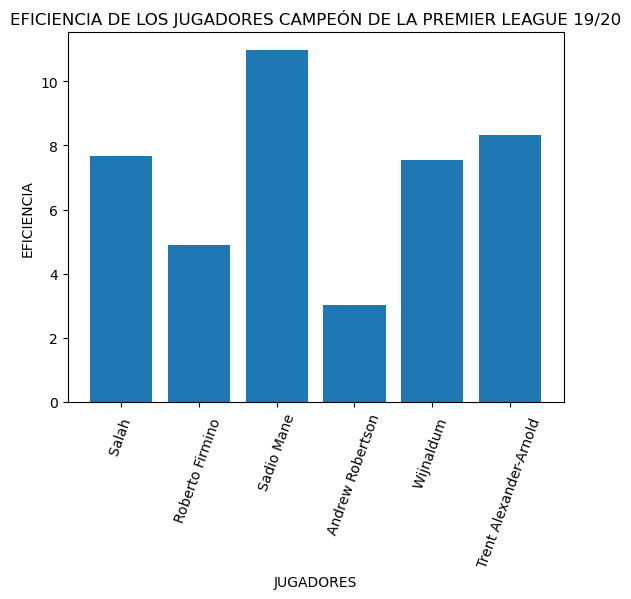

In [87]:
X_L = liverpool_data["jugadores"]
Y_L = liverpool_data["eficiencia"]

plt.bar(X_L , Y_L )
plt.xlabel("JUGADORES")
plt.ylabel("EFICIENCIA")
plt.title("EFICIENCIA DE LOS JUGADORES CAMPEÓN DE LA PREMIER LEAGUE 19/20")
plt.xticks(rotation=70)
plt.show()

* # Regressión Lineal (con todas las variables predictoras posibles)

In [88]:
data_total = pd.concat([data_dummy, equipo_dummy], axis=1)
data_total = data_total.drop(["goles","index","jugadores","equipo"], axis=1)
data_total.head()

,toques_area,comienzo,minutos_jugados,foul_recibido,Defender,Forward,Midfielder,Arsenal,Aston Villa,Bournemouth,...,M. City,M. United,Newcastle,Norwich City,Sheffield Utd,Southampton,Tottenham,Watford,West Ham,Wolves
0,248,33,2876,18,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,239,30,2651,40,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,192,37,3280,120,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,184,34,2988,16,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,171,37,3236,35,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
X2 = data_total
X2.head()

,toques_area,comienzo,minutos_jugados,foul_recibido,Defender,Forward,Midfielder,Arsenal,Aston Villa,Bournemouth,...,M. City,M. United,Newcastle,Norwich City,Sheffield Utd,Southampton,Tottenham,Watford,West Ham,Wolves
0,248,33,2876,18,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,239,30,2651,40,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,192,37,3280,120,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,184,34,2988,16,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,171,37,3236,35,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
lm1 = LinearRegression()
lm1.fit(X2 , y)

LinearRegression()

In [91]:
X_train , X_test , y_train , y_test  = train_test_split(X2, y, test_size=0.3 , random_state=42 )

In [102]:
y_pred = lm1.predict(X_test)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)*100


print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"r2:{r2}")

MAE:2.6361570329141233
MSE:10.123159540653957
r2:72.67621285212164


* ## El modelo sigue casi igual, pero haremos una validación cruzada para ver si realmente es mejor o no este modelo con todas las variables predictoras posibles.

-----

In [93]:
y_pred = cross_val_predict(lm1 , X_pred , y , cv=98)

mae = mean_absolute_error(y , y_pred)
mse = mean_squared_error(y , y_pred)
r2 = r2_score(y , y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"r2:{r2}")

MAE: 2.9884892732921546
MSE: 19.266661351637534
r2:0.5345137676456972


* ## El modelo que contiene todas las variables predictoras el valor del MAE es = 2.98 y un R2 de 53.45, lo que sugiere que el modelo puede hacer predicciones precisas en promedio, pero todavía hay una cantidad significativa de variabilidad en los datos que no se explica por casi todas las variables predictoras utilizadas en el modelo.
.----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----
----


* # Creamos un modelo de XGboost regresor.
    * ## (Este modelo es una variante del Gradient Boosting Regresor que utiliza una implementación más eficiente y escalable para entrenar múltiples árboles de decisión. Es muy popular en competencias de ciencia de datos debido a su alta precisión y velocidad.)

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear modelo con 100 árboles y profundidad máxima de 5 niveles
gb_model = GradientBoostingRegressor(n_estimators=300, max_depth=10)

# Entrenar modelo con tus datos de entrenamiento
gb_model.fit(X_train, y_train)

# Hacer predicciones con tus datos de prueba
y_pred_gb = gb_model.predict(X_test)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
mae = mean_absolute_error(y_test , y_pred_gb)
mse = mean_squared_error(y_test , y_pred_gb)
r2 = r2_score(y_test , y_pred_gb)*100


print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"r2:{r2}")

MAE:2.3595251103930113
MSE:13.03950391675197
r2:64.80460195214499


* ### Evidentemente para este modelo si sirve el XGboost regresor, Nos arroja un valor negativo bueno de R2 = 64.80 y un MAE = 2.35 . pero seguimo teniendo el mejor modelo con la regresion Lineal
.----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-----
-----

* # Crearemos un análisis de comparación de equipos.

In [189]:
variable = ["toques_area" , "comienzo" , "minutos_jugados" , "foul_recibido" , "goles"]

In [190]:
grupo = data.groupby("equipo")

In [194]:
estadistica = grupo[variable].mean()
estadistica

,toques_area,comienzo,minutos_jugados,foul_recibido,goles
equipo,,,,,
Arsenal,97.666667,26.333333,2340.000000,34.000000,12.333333
Aston Villa,74.600000,26.000000,2265.600000,59.200000,1.600000
Bournemouth,66.600000,22.800000,2056.600000,33.400000,1.600000
Brighton,90.333333,24.666667,2191.000000,23.333333,5.000000
Burnley,62.750000,26.000000,2306.250000,28.750000,3.500000
Chelsea,91.833333,24.666667,2249.333333,27.500000,7.000000
Crystal Palace,95.400000,30.600000,2661.400000,61.600000,3.000000
Everton,68.875000,24.000000,2123.625000,27.250000,3.500000
Leicester,91.166667,25.500000,2204.000000,34.833333,6.166667


* # Observación sobre el análisis de media por equipo.
    * ### Mas toques en el area : M.city = 142.71 - Liverpool = 127.16
    * ### Jugadores con mas minutos jugados dentro de los 100 : Liverpool = 2972 - Wolves = 2770.2
    * ### Equipo con mas fouls recibido dentro de la lista de los 100 : Crystal Palace = 61.60 - Aston Villa = 59.20
    * ### Goles por equipo con la media mas alta : Arsenal = 12.33 - M.city = 12.28
-----

* # Crearemos un grafico de barras para que se pueda ver y entender mejor.
    * ### Tendremos encuenta solamente los 3 datos "mas importantes"

In [207]:
variable1 = ["toques_area" , "foul_recibido" , "goles"]
grupo = data.groupby("equipo")
estadistica = grupo[variable1].mean()

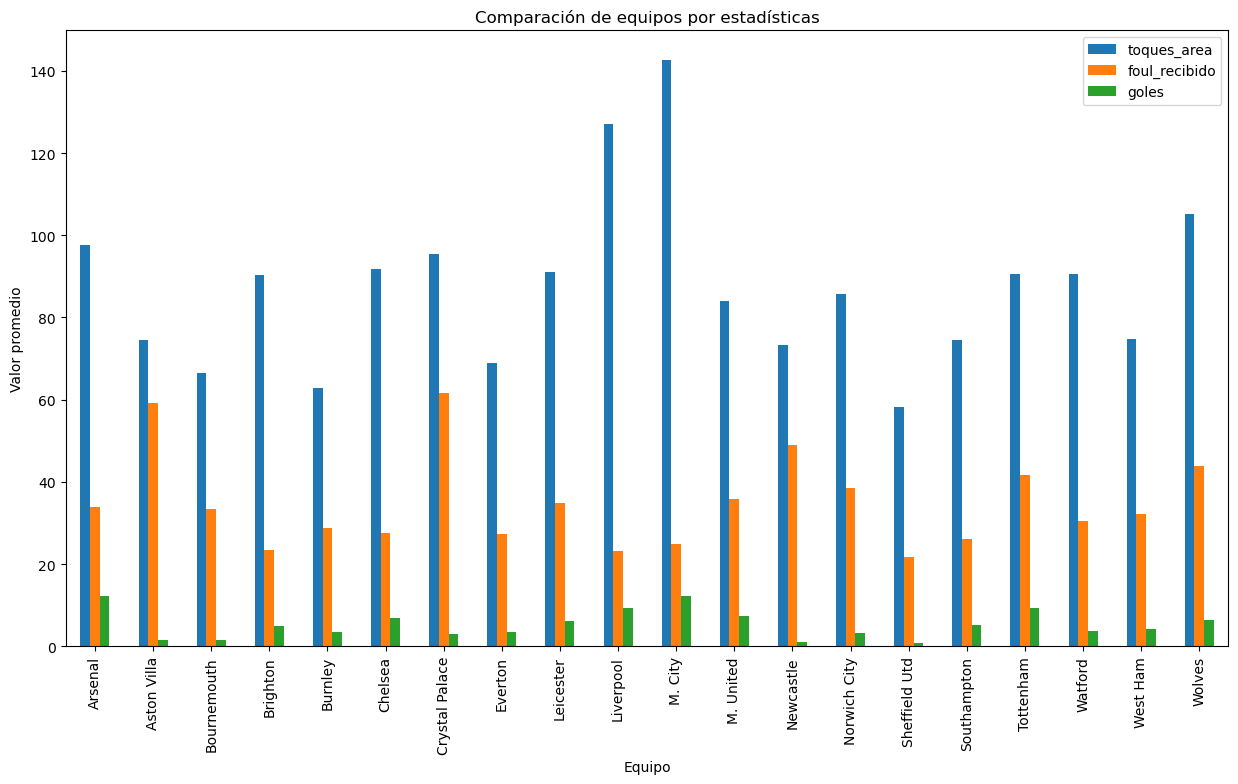

In [212]:
estadistica.plot(kind="bar" , figsize=(15,8))
plt.xlabel('Equipo')
plt.ylabel('Valor promedio')
plt.title('Comparación de equipos por estadísticas')
plt.legend(variable1)

plt.show()

-----
* # Usaremos el mejor modelo para hacer una predicción.

In [232]:
X_pred = X1[["toques_area", "Defender","Forward","Midfielder"]]

In [233]:
lm = LinearRegression()
lm.fit(X_pred , y)

LinearRegression()

In [234]:
#### ### Dividimos otra vez en variable grupos y entrenamiento. 
X_train , X_test , y_train , y_test  = train_test_split(X_pred, y, test_size=0.3 , random_state=42 )

In [235]:
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"r2:{r2}")

MAE:2.363262076655633
MSE:10.2351851666449
r2:72.373840421124


In [245]:
#### #### Creamos una predicción.
jugador_X = pd.DataFrame({"toques_area":[94] , "Defender":[0] , "Forward":[0], "Midfielder":[1]})
jugador_pred = lm.predict(jugador_X)

In [246]:
print("Predicción de goles sobre un jugador X", jugador_pred[0])

Predicción de goles sobre un jugador X [4.89190607]


* # La predicción de goles sobre un jugador con 94 toques en el area rival y siendo volante/medio es de 4.89 goles por temporada.
    * # teniendo en cuenta que el MAE es de 2.36 (es decir puede hacer 2 goles mas o 2 goles menos segun su predicción).